In [9]:
import numpy as np
import matplotlib.pyplot as plt
import ctypes
from ctypes import *
import re

# Cll the C-Code
ll = ctypes.cdll.LoadLibrary
lib_ckf = ll("./filterpy_unit_algorithmckf.so")
lib_detect = ll("./filterpy_unit_algorithmdetect.so")

print("This is U0 & I0 test.")

# 计算前 2 个周波的方差
#print(np.mean(z0[0:128]))
#print(np.mean(z0[0:256]))
#wave_std = np.std(z0[0:128], ddof=1) # 计算全局标准差，默认情况下，numpy 计算的是总体标准偏差，ddof = 0
#print("wave_std = %f" % wave_std)

# 计算前 3 个点的绝对值的平均用于赋值 P
#wave_mea = sum(abs(z01[0:3]))/3
#print("wave_mea_first3 = %f" % wave_mea)

# 取全部周波上的最大5个点绝对值,并剔除前面2个点，留下次大的后3个点，以防数据干扰。
#print("wave_max = %f" % max(z01))

# Open file
# 返回一个文件对象
# √ 故障回放__装置录波_20181123\二阶导数\测试记录_@20181114_New
#file = open("./bay01_0093_20181002_032654_102+all.prn")
# √ 小电流_波形\故障回放__装置录波_20181123\二阶导数\测试记录_@20181116_New
#file = open("./new__index572__l3_in_500_b__bay01_0115_20181004_003120_502+all.prn")
# √ New__Index631+1__L7 区内消弧线圈 0欧 B相__BAY01_0062_20181001_221957_054  ### 4/5 区外
#file = open("./new__index631+1__l7_in_0_b__bay01_0062_20181001_221957_054+all.prn")
# √ 二阶导数\测试记录_@20181113/New__Index582__L3 区外 L5 1000欧 A相__BAY01_0043_20181001_041918_151__全部列数据.prn ### 4/5 区外
#file = open("./new__index582_l3_outer_l5_1000_a__bay01_0043_20181001_041918_151+all.prn")
# √ 二阶导数\测试记录_@20181113/New__曾经有问题__Index577__L3 区外 L5 1000欧 B相__BAY01_0054_20181001_210554_074__全部列数据 ### 5/5 区外
#file = open("./New__EverFailed_Index577__L3_outer_L5 1000_B__BAY01_0054_20181001_210554_074+all.prn")
######################################################################
# √ 故障回放__试验：PDZ810录波回放_小电流接地_20190108\研发中心波形\1区内动作5个波形\__567__F ### 4/5 区内 f2.== 5/5
#file = open("./PDZ810_20190108_1_zone_in_5_567F__BAY01_0226_20181126_063009_845+ALL.prn")

# √ 故障回放__试验：PDZ810录波回放_小电流接地_20190108\研发中心波形\1区内动作5个波形\__696__F ### 4/5 区内  f2.== 5/5
#file = open("./PDZ810_20190108_1_zone_in_5_696F__BAY01_0229_20181126_063427_211+ALL.prn")

# √ 故障回放__试验：PDZ810录波回放_小电流接地_20190108\研发中心波形\1区内动作5个波形\__697__F ### 4/5 区内  f2.== 5/5
#file = open("./PDZ810_20190108_1_zone_in_5_697F__BAY01_0225_20181126_062830_366+ALL.prn")

# √ 故障回放__试验：PDZ810录波回放_小电流接地_20190108\研发中心波形\1区内动作5个波形\__824__F ### 5/5 区内 f2.== 5/5
#file = open("./PDZ810_20190108_1_zone_in_5_824F__BAY01_0227_20181126_063135_508+ALL.prn")

# √ 故障回放__试验：PDZ810录波回放_小电流接地_20190108\研发中心波形\1区内动作5个波形\__935__F ### 4/5 区内 f2.== 5/5
#file = open("./PDZ810_20190108_1_zone_in_5_935F__BAY01_0228_20181126_063245_035+ALL.prn")

# √ 故障回放__试验：PDZ810录波回放_小电流接地_20190108\研发中心波形\1区内动作5个波形\__159__F ### 4/5 区外 f2.== 5/5 
# √ threshold = 0.320892  # 8.708148  # 0.895679 # 5.296178
#file = open("./new__index582_l3_outer_l5_1000_a__bay01_0043_20181001_041918_151+all.prn")

# √ 故障回放__试验：PDZ810录波回放_小电流接地_20190108\研发中心波形\1区内动作5个波形\__214__F ### 4/5 区外 f2.== 5/5
#file = open("./PDZ810_20190108_1_outer_in_5_214F__BAY01_0231_20181126_064056_399+ALL.prn")

# √ 故障回放__试验：PDZ810录波回放_小电流接地_20190108\研发中心波形\1区内动作5个波形\__342__F ### 5/5 区外 f2.== 5/5
#file = open("./PDZ810_20190108_1_outer_in_5_342F__BAY01_0230_20181126_063655_693+ALL.prn")

# × 故障回放__试验：PDZ810录波回放_小电流接地_20190108\研发中心波形\1区内动作5个波形\__581__F ### 1/5 区外（从相位角分析，我认为是区内故障） f2.== 5/5
#file = open("./PDZ810_20190108_1_outer_in_5_581F__BAY01_0234_20181126_065549_573+ALL.prn")

# √ 故障回放__试验：PDZ810录波回放_小电流接地_20190108\研发中心波形\1区内动作5个波形\__965__F ### 5/5 区外（从相位角分析，我认为是区内故障）
#file = open("./PDZ810_20190108_1_outer_in_5_965F__BAY01_0233_20181126_065326_314+ALL.prn")

#  故障回放__试验：PDZ810录波回放_小电流接地_20190108\研发中心波形\高阻接地\__049__F ### /5 区外 (需再验证, 该波形要调整读取操作)
#file = open("./PDZ810_20190108__RD_resistance_049__F__BAY01_0223_20181126_062332_069+ALL.prn")

#  故障回放__试验：PDZ810录波回放_小电流接地_20190108\研发中心波形\高阻接地\__705__F ### /5 区外 (需再验证) f2.== 5/5
#file = open("./PDZ810_20190108__RD_resistance_705__F__BAY01_0224_20181126_062618_840+ALL.prn")

# √ 故障回放__试验：PDZ810录波回放_小电流接地_20190108\研发中心波形\区内\__276__F ### 5/5 区内 f2.== 5/5
#file = open("./PDZ810_20190108__RD_IN_276__F_BAY01_0236_20181126_070304_349+ALL.prn")

# √ 故障回放__试验：PDZ810录波回放_小电流接地_20190108\研发中心波形\区内\__287__F ### 4/5 区内 f2.== 5/5
#file = open("./PDZ810_20190108__RD_IN_287__F_BAY01_0239_20181126_071233_183+ALL.prn")

# √ 故障回放__试验：PDZ810录波回放_小电流接地_20190108\研发中心波形\区内\__532__F ### 3/5 区内 f2.== 5/5
#file = open("./PDZ810_20190108__RD_IN_532__F_BAY01_0238_20181126_070646_070+ALL.prn")

# √ 故障回放__试验：PDZ810录波回放_小电流接地_20190108\研发中心波形\区内\__641__F ### 4/5 区内 f2.== 5/5
#file = open("./PDZ810_20190108__RD_IN_641__F_BAY01_0235_20181126_070131_618+ALL.prn")

# √ 故障回放__试验：PDZ810录波回放_小电流接地_20190108\研发中心波形\区内\__909__F f1.### 4/5 区内 f2.== 5/5 区内
#file = open("./PDZ810_20190108__RD_IN_909__F_BAY01_0237_20181126_070446_500+ALL.prn")

# √ 小电流_波形\波形__小电流波形\2017-07-20 第五项检测\L7 区内消弧线圈 1000欧 B相
#file = open("./NARI__2017-07-20__5_L7_Zone_In_Coil_1000_B__2017-07-20@10-50-00.#201C+ALL.prn")
#u0 = np.append(u0, int(c_array[1])/1000) #直接向 u0 里添加 c_array[8]
#z0 = np.append(z0, int(c_array[9])-34) #直接向 z0 里添加 c_array[4]
######################################################################
# √ 故障回放__试验：PDZ810录波回放_小电流接地_20190108\中国电科院\__217  .### f1==4/5 区内   f2.== 5/5 区内 
#file = open("./PDZ810_20190108__217_BAY01_0216_20181126_055059_916.prn")

# √ 故障回放__试验：PDZ810录波回放_小电流接地_20190108\中国电科院\__277  .### f1==4/5 区外   f2.== 5/5 区外 
#file = open("./PDZ810_20190108__277_BAY01_0217_20181126_055452_069.prn") 

# √ 故障回放__试验：PDZ810录波回放_小电流接地_20190108\中国电科院\__278  .### f1==3/5 区内   f2.== 5/5 区外
#file = open("./PDZ810_20190108__278_BAY01_0222_20181126_061808_455.prn")

# √ 故障回放__试验：PDZ810录波回放_小电流接地_20190108\中国电科院\__312  .### f1==4/5 区外   f2.== 5/5 区外
#file = open("./PDZ810_20190108__312_BAY01_0220_20181126_060301_890.prn")

# √ 故障回放__试验：PDZ810录波回放_小电流接地_20190108\中国电科院\__481  .### f1==4/5 区内   f2.== 5/5 区内
#file = open("./PDZ810_20190108__481_BAY01_0213_20181126_054459_978.prn")

# √ 故障回放__试验：PDZ810录波回放_小电流接地_20190108\中国电科院\__540  .### f1==4/5 区内   f2.== 5/5 区内
#file = open("./PDZ810_20190108__540_BAY01_0212_20181126_054251_319.prn")

# √ 故障回放__试验：PDZ810录波回放_小电流接地_20190108\中国电科院\__580  .### f1==4/5 区外   f2.== 5/5 区外
#file = open("./PDZ810_20190108__580_BAY01_0218_20181126_055725_728.prn")

# √ 故障回放__试验：PDZ810录波回放_小电流接地_20190108\中国电科院\__727  .### f1==4/5 区内   f2.== 5/5 区内
#file = open("./PDZ810_20190108__727_BAY01_0214_20181126_054624_380.prn")

# √ 故障回放__试验：PDZ810录波回放_小电流接地_20190108\中国电科院\__829  .### f1==4/5 区内   f2.== 5/5 区外 (需再验证)
#file = open("./PDZ810_20190108__829_BAY01_0221_20181126_061055_366.prn")

# √ 故障回放__试验：PDZ810录波回放_小电流接地_20190108\中国电科院\__925  .### f1==4/5 区内   f2.== 5/5 区内
#file = open("./PDZ810_20190108__925_BAY01_0215_20181126_054814_154.prn")

# √ 故障回放__试验：PDZ810录波回放_小电流接地_20190108\中国电科院\__981  .### f1==5/5 区外   f2.== 5/5 区外
#file = open("./PDZ810_20190108__981_BAY01_0219_20181126_060056_456.prn")

######################################################################
# √ tmp\故障回放__20190111_1735\__L1区内不接地1000欧C相  .### f1==5/5 区内   f2.== 5/5 区内 @2019-01-12
#file = open("./tmp_20190111_1735__BAY01_0355_20181130_030005_246+ALL.prn")

######################################################################
# √ tmp\故障回放__20190111_1735\_第二项_L1区内不接地1000欧B相  .### f1==5/5 区内   f2.== 5/5 区内 @2019-01-13
#file = open("./tmp__20190113_1550__BAY01_0356_20181201_024236_081+ALL.prn")

# √ tmp\故障回放__20190111_1735\_第二项_L1区内不接地1000欧C相  .### f1==5/5 区内   f2.== 5/5 区内 @2019-01-13 
# √ threshold = 1.783289 满足 1.5 倍
#file = open("./tmp__20190113_1550__BAY01_0370_20181201_035034_556+ALL.prn")

# √ tmp\故障回放__20190113_1550\第一至五项\
#file = open("./PDZ810__1to5__20190113_1550/BAY01_0356_20181201_024236_081+ALL.prn")

# √ tmp\故障回放__20190113_1550\第一至五项\
#file = open("./PDZ810__1to5__20190113_1550/BAY01_0370_20181201_035034_556+ALL.prn")

# √ tmp\故障回放__20190113_1550\第一至五项\
#file = open("./PDZ810__1to5__20190113_1550/BAY01_0375_20181201_040124_671+ALL.prn")

# √ tmp\故障回放__20190113_1550\第一至五项\
#file = open("./PDZ810__1to5__20190113_1550/BAY01_0376_20181201_040604_721+ALL.prn")

# √ tmp\故障回放__20190113_1550\第一至五项\
#file = open("./PDZ810__1to5__20190113_1550/BAY01_0378_20181201_041013_553+ALL.prn")

# √ tmp\故障回放__20190113_1550\第一至五项\
# √ threshold = 0.973923
#file = open("./PDZ810__1to5__20190113_1550/BAY01_0387_20181201_045410_445+ALL.prn")

# √ tmp\故障回放__20190113_1550\第一至五项\
# !!! (需重复检查)threshold = 1.458731
file = open("./PDZ810__1to5__20190113_1550/BAY01_0390_20181201_045929_730+ALL.prn")

# √ tmp\故障回放__20190113_1550\第一至五项\
# !!! (需重复检查)threshold = 1.781918
#file = open("./PDZ810__1to5__20190113_1550/BAY01_0393_20181201_051157_154+ALL.prn")

# √ tmp\故障回放__20190113_1550\第一至五项\
#file = open("./PDZ810__1to5__20190113_1550/BAY01_0401_20181201_053359_392+ALL.prn")

# √ tmp\故障回放__20190113_1550\第一至五项\
# !!! (需重复检查)hreshold = 1.180684  # 500欧过渡电阻&区外，起点很微弱
#file = open("./PDZ810__1to5__20190113_1550/BAY01_0402_20181201_053858_192+ALL.prn")

# √ tmp\故障回放__20190113_1550\第一至五项\
# !!! (需重复检查)threshold = 1.689655
#file = open("./PDZ810__1to5__20190113_1550/BAY01_0403_20181201_054059_978+ALL.prn")

# √ tmp\故障回放__20190113_1550\第一至五项\
# √ threshold = 1.480170
#file = open("./PDZ810__1to5__20190113_1550/BAY01_0404_20181201_054510_371+ALL.prn")

# √ tmp\故障回放__20190113_1550\第一至五项\
# !!! (需重复检查)  threshold = 0.835833   # 起点很微弱
#file = open("./PDZ810__1to5__20190113_1550/BAY01_0406_20181201_055046_430+ALL.prn")

# √ tmp\故障回放__20190113_1550\第一至五项\
#file = open("./PDZ810__1to5__20190113_1550/BAY01_0411_20181201_060705_283+ALL.prn")

# √ tmp\故障回放__20190113_1550\第一至五项\
#file = open("./PDZ810__1to5__20190113_1550/BAY01_0412_20181201_060958_951+ALL.prn")

# √ tmp\故障回放__20190113_1550\第一至五项\
#file = open("./PDZ810__1to5__20190113_1550/BAY01_0414_20181201_075744_796+ALL.prn")

# √ tmp\故障回放__20190113_1550\第一至五项\
#file = open("./PDZ810__1to5__20190113_1550/BAY01_0419_20181201_080929_420+ALL.prn")

# √ tmp\故障回放__20190113_1550\第一至五项\
#file = open("./PDZ810__1to5__20190113_1550/BAY01_0420_20181201_081429_406+ALL.prn")

# √ tmp\故障回放__20190113_1550\第一至五项\
#file = open("./PDZ810__1to5__20190113_1550/BAY01_0421_20181201_081714_932+ALL.prn")

# √ tmp\故障回放__20190113_1550\第一至五项\
#file = open("./PDZ810__1to5__20190113_1550/BAY01_0422_20181201_082116_197+ALL.prn")

# √ tmp\故障回放__20190113_1550\第一至五项\
#file = open("./PDZ810__1to5__20190113_1550/BAY01_0423_20181201_082624_375+ALL.prn")

# √ tmp\故障回放__20190113_1550\第一至五项\
#file = open("./PDZ810__1to5__20190113_1550/BAY01_0425_20181201_083649_536+ALL.prn")

# √ tmp\故障回放__20190113_1550\第一至五项\
#file = open("./PDZ810__1to5__20190113_1550/BAY01_0426_20181201_084010_644+ALL.prn")

# √ tmp\故障回放__20190113_1550\第一至五项\
#file = open("./PDZ810__1to5__20190113_1550/BAY01_0428_20181201_084535_758+ALL.prn")

# √ tmp\故障回放__20190113_1550\第一至五项\
#file = open("./PDZ810__1to5__20190113_1550/BAY01_0430_20181201_085011_191+ALL.prn")

# √ tmp\故障回放__20190113_1550\第一至五项\
#file = open("./PDZ810__1to5__20190113_1550/BAY01_0434_20181201_090110_480+ALL.prn")

# √ tmp\故障回放__20190113_1550\第一至五项\
# √ threshold = 0.996933 # 满足 1.5 倍
#file = open("./PDZ810__1to5__20190113_1550/BAY01_0436_20181201_090531_369+ALL.prn")

# √ tmp\故障回放__20190113_1550\第一至五项\
# !!! (需重复检查) threshold = 1.662070  # 起点太平缓
#file = open("./PDZ810__1to5__20190113_1550/BAY01_0437_20181201_090745_711+ALL.prn")

# √ tmp\故障回放__20190113_1550\第一至五项\
# √ threshold = 0.972086  # 满足 1.5 倍
#file = open("./PDZ810__1to5__20190113_1550/BAY01_0439_20181201_091531_705+ALL.prn")


######################################################################
# tmp\故障回放__20190122_1500\负荷开关\0001__BAY01_0514_20181210_023118_850+ALL.prn
#file = open("./PDZ810__20190122_1500_Switch__0001__BAY01_0514_20181210_023118_850__U0+ALL+Correlator.prn")

######################################################################
line = file.readline()

u0, z0 = [],[]

nCount = 0

for line in file:
    if nCount > 1664:
        break
    nCount = nCount + 1
    # 正则表达式
    c_array = re.split(r" +",line)
    # Col_1.append(c_array[1])    
    u0 = np.append(u0, int(c_array[8])) #直接向 u0 里添加 c_array[8]
    z0 = np.append(z0, int(c_array[4])) #直接向 z0 里添加 c_array[4]

print(u0)
print(z0)
#plt.figure(figsize=(16, 8))
#plt.plot(z0)

This is U0 & I0 test.
[  0.   1.   1. ... 107. 120. 131.]
[ 0.  0. -3. ... 61. 51. 51.]


In [10]:
# 2018-12-26 要注意 c_short, c_float 等的类型必须和 C 语言形参类型一致。
INPUT = c_float * len(z0)
data = INPUT()
for i in range(len(z0)):
    data[i] = z0[i]

INPUT = c_float * len(z0)
gfLocalSampI0 = INPUT()
for i in range(len(z0)):
    gfLocalSampI0[i] = 0.0

# 打印 I0 的输入值
#lib_ckf.unit_ckf_test_case()

# 2018-12-26 byref() 传递指针，因为 C 语言形参是指针类型。
lib_ckf.unit_ckf_process(byref(data), len(z0), byref(gfLocalSampI0));


In [11]:
# Deal U0 Data
lib_detect.unit_unit_detect_test_case()

# 2018-12-26 要注意 c_short, c_float 等的类型必须和 C 语言形参类型一致。
INPUT = c_float * len(u0)
gfLocalSampU0 = INPUT()
for i in range(len(u0)):
    gfLocalSampU0[i] = u0[i]

# 2018-12-26 byref() 传递指针，因为 C 语言形参是指针类型。
index = lib_detect.unit_detect_algorithm_run(byref(gfLocalSampU0), 1664);

print("Find the Index is %d \r\n" % (index))

Find the Index is 527 



-132.54953384399414
-199.11187744140625
-154.28278350830078
-184.40771102905273
-230.87123107910156


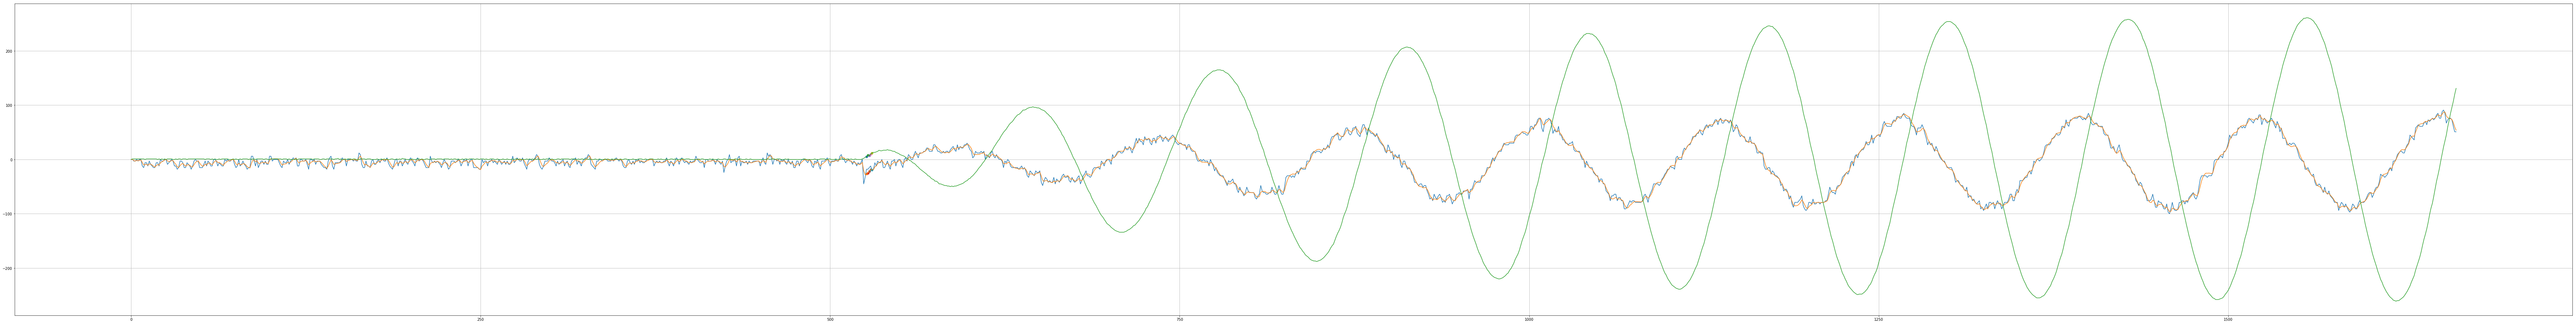

In [12]:
# f.1 从 U0 的起点开始找 5 个连续的点比较 U0 和 I0 的极性。
# Draw I0
plt.figure(figsize=(128, 16))
plt.plot(data)
plt.plot(gfLocalSampI0)

#index = 544

# Draw U0
#plt.plot(u0)
plt.plot(gfLocalSampU0)
# 显示突变的U0坐标点
plt.scatter(index-1, u0[index-1])
plt.scatter(index-1, gfLocalSampI0[index-1])
plt.scatter(index, u0[index])
plt.scatter(index, gfLocalSampI0[index])
plt.scatter(index+1, u0[index+1])
plt.scatter(index+1, gfLocalSampI0[index+1])
plt.scatter(index+2, u0[index+2])
plt.scatter(index+2, gfLocalSampI0[index+2])
plt.scatter(index+3, u0[index+3])
plt.scatter(index+3, gfLocalSampI0[index+3])
plt.grid(True)

# Decice Dir
print(u0[index-1]*gfLocalSampI0[index-1])
print(u0[index]*gfLocalSampI0[index])
print(u0[index+1]*gfLocalSampI0[index+1])
print(u0[index+2]*gfLocalSampI0[index+2])
print(u0[index+3]*gfLocalSampI0[index+3])

# Deciced 

-154.28278350830078
-184.40771102905273
-230.87123107910156
-243.02289581298828
-175.60741424560547
5


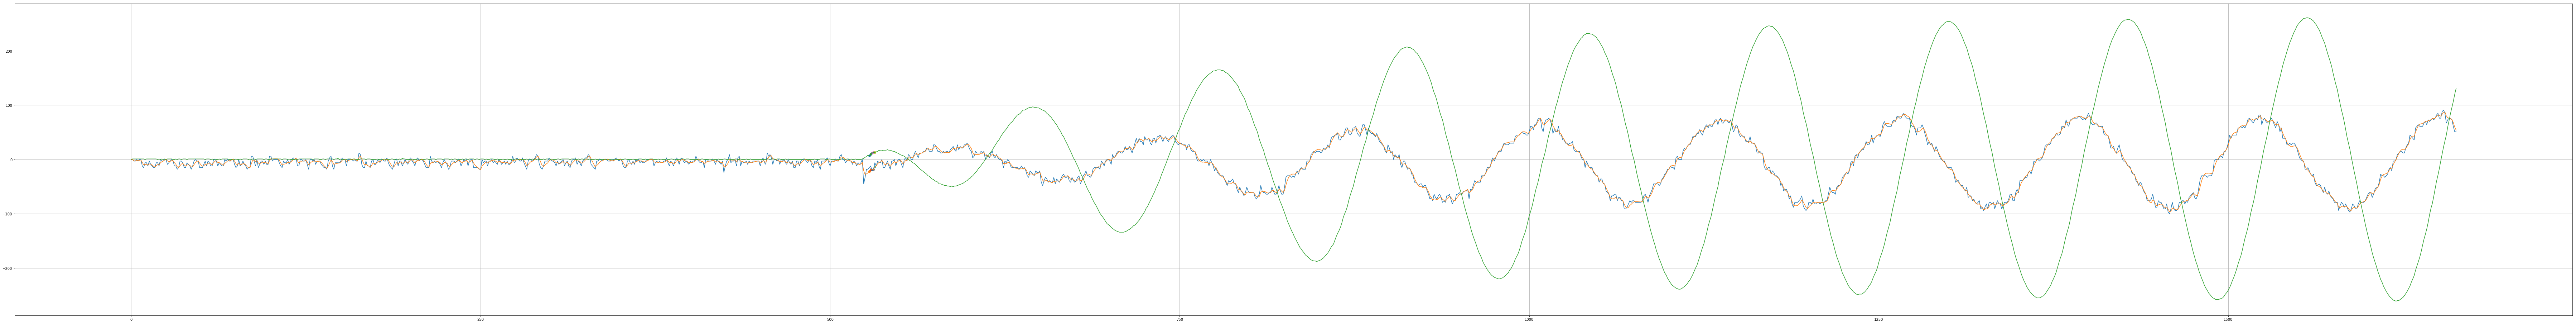

In [13]:
# f.2+s1. 用 U0 的起点 index，然后从 i0[index] 之后找 i0 第一个极值点，在该 i0 的极值点左右各 2 个点+当前极值点比较 U0 和 I0 的极性。
#Draw I0
plt.figure(figsize=(128, 16))
plt.plot(data)
plt.plot(gfLocalSampI0)

#index = 544

#Draw U0
#plt.plot(u0)
plt.plot(gfLocalSampU0)
plt.grid(True)

# fs2+s2. Find the |I0.Max| 
# 局部变量，记录是区内还是区外，n_dir>=3：区内 3/5， 否则是区外。
n_dir = 0
for i in range(index, index+64):
    if abs(gfLocalSampI0[i-1]) < abs(gfLocalSampI0[i]) and abs(gfLocalSampI0[i]) >= abs(gfLocalSampI0[i+1]):
        # Find the|I0.Max|, and 更新
        i0_index = i
        for j in range(i0_index-2, i0_index+3):
            plt.scatter(j, u0[j])
            plt.scatter(j, gfLocalSampI0[j])
            # Decicde Dir
            print(u0[j]*gfLocalSampI0[j])
            if(u0[j]*gfLocalSampI0[j] < 0):
                n_dir = n_dir+1                
        break
# 区内还是区外，n_dir>=3：区内 3/5， 否则是区外。
print("========")
print(n_dir)